In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
t1 = np.pi / 15
t2 = -np.pi / 9
t3 = -np.pi / 20

Rx = np.array([
    [1, 0, 0],
    [0, np.cos(t1), -np.sin(t1)],
    [0, np.sin(t1), np.cos(t1)]
])

Ry = np.array([
    [np.cos(t2), 0, np.sin(t2)],
    [0, 1, 0],
    [-np.sin(t2), 0, np.cos(t2)]
])

Rz = np.array([
    [np.cos(t3), -np.sin(t3), 0],
    [np.sin(t3), np.cos(t3), 0],
    [0, 0, 1]
])

Sigma = np.diag([3, 1, 0.5])

X = Rz @ Ry @ Rx @ Sigma

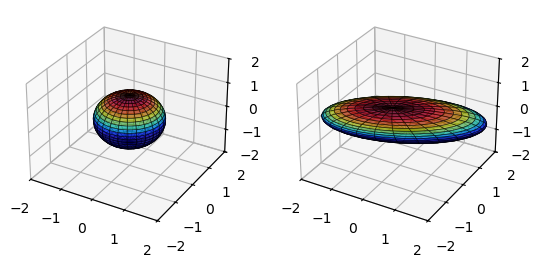

In [11]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

In [ ]:
R